<a href="https://colab.research.google.com/github/rajendra11g/DL/blob/main/3_DeepAutoEncoderCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the dataset
(xtrain,ytrain), (xtest,ytest)=cifar10.load_data()
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.
xtrain=xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest=xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

170508288/170498071 [==============================] - 4s 0us/step


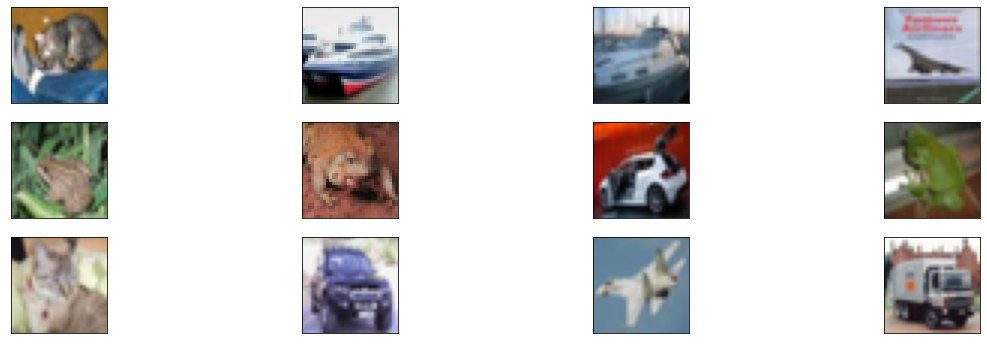

In [4]:
n = 12
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
print('xtrain shape is:',xtrain.shape)
print('xtest shape is:',xtest.shape)
#32 * 32 * 3 = 3072

In [6]:
inputdim=32*32*3
latentdim=500

In [7]:
#Encoder
inputvec=Input(shape=(inputdim,))
enc1=Dense(2048) (inputvec)
act1=Activation('relu') (enc1)
enc2=Dense(1024) (act1)
bn1=BatchNormalization() (enc2)
act2=Activation('relu') (bn1)
d1=Dropout(0.2) (act2)

enc3=Dense(512) (d1)
act3=Activation('relu') (enc3)
enc4=Dense(256) (act3)
bn2=BatchNormalization() (enc4)
act4=Activation('relu') (bn2)
d2=Dropout(0.2) (act4)

enc5=Dense(128) (d2)
act5=Activation('relu') (enc5)
d3=Dropout(0.2) (act5)
enc6=Dense(latentdim) (d3)
bn3=BatchNormalization() (enc6)
encoder=Activation('relu') (bn3)

In [8]:
encode=Model(inputvec,encoder)

In [9]:
#Decoder
dec1=Dense(128) (encoder)
bn4=BatchNormalization() (dec1)
act6=Activation('relu') (bn4)

d4=Dropout(0.2) (act6)
dec2=Dense(256) (d4)
act7=Activation('relu') (dec2)
dec3=Dense(512) (act7)
bn5=BatchNormalization() (dec3)
act8=Activation('relu') (bn5)

d5=Dropout(0.2) (act8)
dec4=Dense(1024) (d5)
act9=Activation('relu') (dec4)
dec5=Dense(2048) (act9)
bn6=BatchNormalization() (dec5)
act10=Activation('relu') (bn6)
decoder=Dense(inputdim, activation='sigmoid') (act10)

In [10]:
autoencoder=Model(inputvec,decoder)
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                           

In [11]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)

In [12]:
autoencoder.compile(loss='binary_crossentropy',optimizer=opt)

In [13]:
hist=autoencoder.fit(xtrain,xtrain,epochs=100,batch_size=256,shuffle=True, validation_data=(xtest,xtest))

Epoch 1/100
196/196 [==============================] - 159s 789ms/step - loss: 0.6411 - val_loss: 0.6882
Epoch 2/100
196/196 [==============================] - 155s 793ms/step - loss: 0.6282 - val_loss: 0.6405
Epoch 3/100
196/196 [==============================] - 156s 794ms/step - loss: 0.6249 - val_loss: 0.6372
Epoch 4/100
196/196 [==============================] - 156s 795ms/step - loss: 0.6232 - val_loss: 0.6239
Epoch 5/100
196/196 [==============================] - 155s 792ms/step - loss: 0.6205 - val_loss: 0.6212
Epoch 6/100
196/196 [==============================] - 154s 786ms/step - loss: 0.6173 - val_loss: 0.6164
Epoch 7/100
196/196 [==============================] - 156s 795ms/step - loss: 0.6155 - val_loss: 0.6144
Epoch 8/100
196/196 [==============================] - 156s 795ms/step - loss: 0.6140 - val_loss: 0.6102
Epoch 9/100
196/196 [==============================] - 155s 792ms/step - loss: 0.6130 - val_loss: 0.6110
Epoch 10/100
196/196 [==============================] -

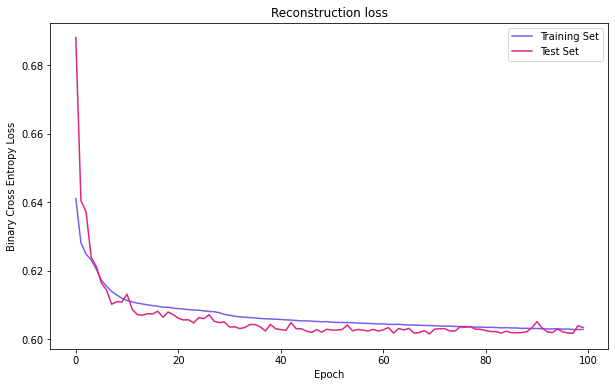

In [14]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [15]:
reconstructed=autoencoder.predict(xtest)

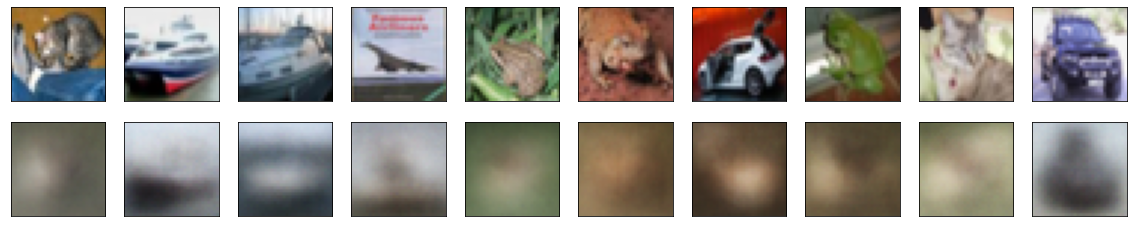

In [16]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(32, 32, 3))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()